In [1]:
#!wget --no-check http://d28rh4a8wqiu5.cloudfront.net/ads1/data/lambda_virus.fa
# Algorithms for DNA Sequencing


## https://github.com/BenLangmead/comp-genomics-class

In [2]:
def readGenome(filename):
    genome=''
    with open(filename,'r') as f:
        for line in f:
            if not line[0] == '>':
                genome += line.rstrip()
    return genome
genome = readGenome(r'C:\Users\12408\Documents\biochem\bowtie2-master\bowtie2-master\example\reference\lambda_virus.fa')


In [3]:
print(len(genome))
genome

48502


'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACCCTCTGAAAAGAAAGGAAACGACAGGTGCTGAAAGCGAGGCTTTTTGGCCTCTGTCGTTTCCTTTCTCTGTTTTTGTCCGTGGAATGAACAATGGAAGTCAACAAAAAGCAGCTGGCTGACATTTTCGGTGCGAGTATCCGTACCATTCAGAACTGGCAGGAACAGGGAATGCCCGTTCTGCGAGGCGGTGGCAAGGGTAATGAGGTGCTTTATGACTCTGCCGCCGTCATAAAATGGTATGCCGAAAGGGATGCTGAAATTGAGAACGAAAAGCTGCGCCGGGAGGTTGAAGAACTGCGGCAGGCCAGCGAGGCAGATCTCCAGCCAGGAACTATTGAGTACGAACGCCATCGACTTACGCGTGCGCAGGCCGACGCACAGGAACTGAAGAATGCCAGAGACTCCGCTGAAGTGGTGGAAACCGCATTCTGTACTTTCGTGCTGTCGCGGATCGCAGGTGAAATTGCCAGTATTCTCGACGGGCTCCCCCTGTCGGTGCAGCGGCGTTTTCCGGAACTGGAAAACCGACATGTTGATTTCCTGAAACGGGATATCATCAAAGCCATGAACAAAGCAGCCGCGCTGGATGAACTGATACCGGGGTTGCTGAGTGAATATATCGAACAGTCAGGTTAACAGGCTGCGGCATTTTGTCCGCGCCGGGCTTCGCTCACTGTTCAGGCCGGAGCCACAGACCGCCGTTGAATGGGCGGATGCTAATTACTATCTCCCGAAAGAATCCGCATACCAGGAAGGGCGCTGGGAAACACTGCCCTTTCAGCGGGCCATCATGAATGCGATGGGCAGCGACTACATCCGTGAGGTGAATGTGGTGAAGTCTGCCCGTGTCGGTTATTCCAAAATGCTGCTGGGTGTTTATGCCTACTTTATAGAGCATA

In [4]:
import zlib
import lzma
lzc = lzma.compress(genome.encode('utf-8'))
len(lzc)

13468

In [5]:
count = {'A': 0, 'C': 0, 'G': 0, 'T': 0}
for base in genome:
    count[base]+=1
print(count)

{'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986}


In [6]:
count[base]

12820

In [7]:
import collections
collections.Counter(genome)

Counter({'G': 12820, 'C': 11362, 'A': 12334, 'T': 11986})

In [8]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [9]:
seqs, quals = readFastq(r'C:\Users\12408\Documents\biochem\Coursera-master\JohnsHopkins\AlgorithmForDNASequencing\CourseMaterials\Week1\SRR835775_1.first1000.fastq')

In [10]:
quals

['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################',
 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########',
 '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A',
 '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################',
 '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==C;CCD(?@>@#############################',
 'CCCFFDFDHGHHDHHGIIIHGIJ<GBBBFBGGHDIH@B)?)0?F>DB#####################################################',
 "???=DD0@3ADB<<CE;+3<;EE?1:)1?C1?3BDCB@;)99)0;@;)-(.7A'55A1?.6;(6;.5;;??#############################",
 "@@@DDF?EFFHA;DDHGI<FDFGECCHF:C9DH9F3):??GHB)BFHEAHBG;C';C@EE45?#####################################",
 '@@@FADDFHGBFFHJJJFGEHGGGGCEGHCBFGGJ:D?FGIDHDFGIBFDGIJ=CEHDH7?=BFD@A;>AB5=2=?BB######################',
 '@CCFFADDHHH<CBGIICGGHIJI?FFGHJ?DHGIJ?DGIIIBFCHHI8@@GE

In [11]:
def phred33ToQ(qual):
    return ord(qual) - 33

In [12]:
def createHist(qualityStrings):
    # Create a histogram of quality scores
    hist = [0]*50
    for read in qualityStrings:
        for phred in read:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


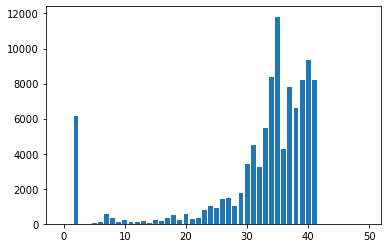

In [13]:
# Plot the histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.show()

# Practical: Analyzing reads by position

https://www.coursera.org/learn/dna-sequencing/lecture/YkDXI/practical-analyzing-reads-by-position

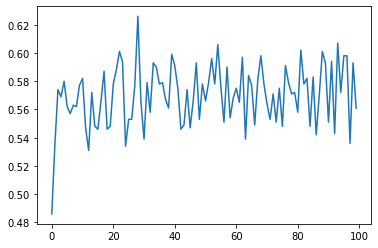

In [14]:
def findGCByPos(reads):
    ''' Find the GC ratio at each position in the read '''
    # Keep track of the number of G/C bases and the total number of bases at each position
    gc = [0] * 100
    totals = [0] * 100
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1
    # Divide G/C counts by total counts to get the average at each position
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])
    return gc

gc = findGCByPos(seqs)
plt.plot(range(len(gc)), gc)
plt.show()

In [15]:
import collections
count = collections.Counter()
for seq in seqs:
    count.update(seq)
count

Counter({'T': 21836, 'A': 21132, 'C': 28272, 'G': 28742, 'N': 18})

In [16]:
import Bio
from Bio.PDB import *

pdbl = PDBList()
pdbl.retrieve_pdb_file('6B7N')


Structure exists: 'C:\Users\12408\Documents\biochem\b7\6b7n.cif' 


'C:\\Users\\12408\\Documents\\biochem\\b7\\6b7n.cif'

In [17]:
import os
os.listdir()

['.ipynb_checkpoints',
 '1jti.cif',
 '1jti.pdb',
 '1p38.pdb.gz',
 '1ubq.pdb',
 '3a6u.pdb',
 '5dfr_minimized.pdb',
 '5dfr_solv-cube_equil.pdb',
 '6lxt.pdb',
 '6vxx.pdb',
 '6vyb.pdb',
 '7k3g.pdb',
 'A structural biology community assessment of AlphaFold 2 applications.pdf',
 'AF-O95544-F1-model_v1.pdb',
 'AF-P28331-F1-model_v1.pdb',
 'AF-P30838-F1-model_v1.pdb',
 'AF-Q76EI6-F1-model_v1.pdb',
 'ala_ala_ala.pdb',
 'ala_ala_ala.psf',
 'AlphaFold2 and the future of structural biology.pdf',
 'Alzheimer’s Crisper cas9.pdf',
 'apoa1.pdb',
 'argon-chemical-potential.py',
 'b7',
 'b7.pdb',
 'benchmark.py',
 'BioChem October.ipynb',
 'BioChem.ipynb',
 'BioChemAugust .ipynb',
 'BioChemJuly.ipynb',
 'biomarkers.pdf',
 'Biopython.pdf',
 'bk_sans_009479.pdf',
 'bowtie2-master',
 'bowtie2-master.zip',
 'CELL BIOLOGY by numbers.pdf',
 'charmm22.par',
 'charmm22.rtf',
 'CMakeLists.txt',
 'Coursera-master',
 'delta.pdb',
 'DNA origami.pdf',
 'dynamic.xtc',
 'Electrical energy storage with engineered biolo

In [18]:
os.listdir('b7')


['6b7n.cif']

In [19]:
parser = MMCIFParser()

In [20]:
structure = parser.get_structure('delta','b7/6b7n.cif')
print(structure)

<Structure id=delta>


C:\Users\12408\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 21879.
  warnings.warn(
C:\Users\12408\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 21991.
  warnings.warn(
C:\Users\12408\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 22103.
  warnings.warn(


In [21]:
def cleandir(obj):
    print(",".join([a for a in dir(obj) if not a.startswith("_")]))

cleandir(structure)

add,atom_to_internal_coordinates,center_of_mass,child_dict,child_list,copy,detach_child,detach_parent,full_id,get_atoms,get_chains,get_full_id,get_id,get_iterator,get_level,get_list,get_models,get_parent,get_residues,has_id,header,id,insert,internal_to_atom_coordinates,level,parent,set_parent,transform,xtra



# nglview
https://github.com/nglviewer/nglview

#!pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install 

In [22]:
import nglview as nv
import py3Dmol

In [23]:
view = nv.show_biopython(structure)
#view.clear_representations()
view.add_ball_and_stick()
view

NGLWidget()

In [25]:
nv.show_biopython?

https://www.rcsb.org/3d-view/6B7N

In [26]:
view.clear_representations()
view.add_cartoon()
#view.add_ball_and_stick()
view

NGLWidget(n_components=1)

!pip install pylev
import pylev

a = 
b =
pylev.levenshtein(a, b)

In [27]:
for model in structure:
    print(f"model {model}")


#count(structure) #since we only have 


model <Model id=0>


In [28]:
model= structure[0]
for chain in model:
    print(f'chain{chain}, Chain ID:{chain.id}')
    
len(model)

chain<Chain id=A>, Chain ID:A
chain<Chain id=B>, Chain ID:B
chain<Chain id=C>, Chain ID:C
chain<Chain id=D>, Chain ID:D
chain<Chain id=E>, Chain ID:E
chain<Chain id=F>, Chain ID:F
chain<Chain id=G>, Chain ID:G
chain<Chain id=H>, Chain ID:H
chain<Chain id=I>, Chain ID:I
chain<Chain id=J>, Chain ID:J
chain<Chain id=K>, Chain ID:K
chain<Chain id=L>, Chain ID:L
chain<Chain id=M>, Chain ID:M
chain<Chain id=N>, Chain ID:N
chain<Chain id=O>, Chain ID:O
chain<Chain id=P>, Chain ID:P
chain<Chain id=Q>, Chain ID:Q
chain<Chain id=R>, Chain ID:R


18

In [29]:
#https://www.youtube.com/watch?v=mL8NPpRxgJA

In [30]:
chain_A = model['A']

for res in chain_A:
    print(f'Residue name: {res.resname}, number:{res.id[1]}')
    


Residue name: ASN, number:52
Residue name: PHE, number:53
Residue name: ASP, number:54
Residue name: VAL, number:55
Residue name: GLY, number:56
Residue name: VAL, number:57
Residue name: LEU, number:58
Residue name: PRO, number:59
Residue name: GLY, number:60
Residue name: TYR, number:61
Residue name: PRO, number:62
Residue name: THR, number:63
Residue name: LYS, number:64
Residue name: ASN, number:65
Residue name: VAL, number:66
Residue name: ASN, number:67
Residue name: LEU, number:68
Residue name: PHE, number:69
Residue name: SER, number:70
Residue name: PRO, number:71
Residue name: LEU, number:72
Residue name: THR, number:73
Residue name: ASN, number:74
Residue name: SER, number:75
Residue name: THR, number:76
Residue name: LEU, number:77
Residue name: PRO, number:78
Residue name: ILE, number:79
Residue name: ASN, number:80
Residue name: GLY, number:81
Residue name: LEU, number:82
Residue name: HIS, number:83
Residue name: ARG, number:84
Residue name: SER, number:85
Residue name: 

In [31]:
res = chain_A[105]
res

<Residue TYR het=  resseq=105 icode= >

In [32]:
for atom in res:
    print(f'{atom.name}')

N
CA
C
O
CB
CG
CD1
CD2
CE1
CE2
CZ
OH


In [33]:
struct_dict = MMCIF2Dict.MMCIF2Dict('b7/6b7n.cif')
print(struct_dict.keys())

dict_keys(['data_', '_entry.id', '_audit_conform.dict_name', '_audit_conform.dict_version', '_audit_conform.dict_location', '_database_2.database_id', '_database_2.database_code', '_pdbx_database_related.db_name', '_pdbx_database_related.details', '_pdbx_database_related.db_id', '_pdbx_database_related.content_type', '_pdbx_database_status.status_code', '_pdbx_database_status.status_code_sf', '_pdbx_database_status.status_code_mr', '_pdbx_database_status.entry_id', '_pdbx_database_status.recvd_initial_deposition_date', '_pdbx_database_status.SG_entry', '_pdbx_database_status.deposit_site', '_pdbx_database_status.process_site', '_pdbx_database_status.status_code_cs', '_pdbx_database_status.methods_development_category', '_pdbx_database_status.pdb_format_compatible', '_pdbx_database_status.status_code_nmr_data', '_audit_author.name', '_audit_author.pdbx_ordinal', '_audit_author.identifier_ORCID', '_citation.abstract', '_citation.abstract_id_CAS', '_citation.book_id_ISBN', '_citation.book

In [34]:
struct_dict['_refine.pdbx_isotropic_thermal_model']

['?']

# BioPython 3D Structure Analysis
https://www.youtube.com/watch?v=mL8NPpRxgJA
    
    

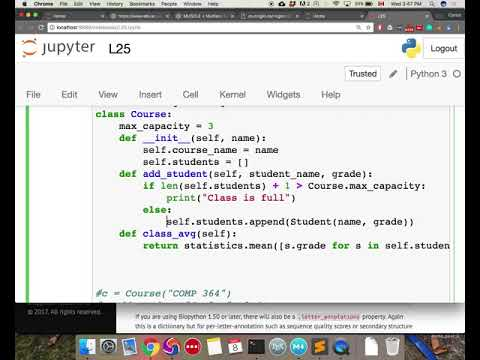

In [35]:
from IPython.display import YouTubeVideo
YouTubeVideo('qQ7rIpB4oOw', width=600, height=400)


In [36]:
from Bio.Seq import Seq

my_seq = Seq("CCCGGAGAGA")



In [37]:
#simtk.testInstallation


In [39]:
import openmm
from simtk.openmm.app import *
from simtk.openmm import *
from simtk.unit import *
import numpy as np

In [ ]:
# Assign a value of 10 picoseconds
time = 10 * picosecond  # 10 * picoseconds will also work.
print("Unit of variable time:", time.unit)
print("time:", time)
print("time [s]:", time / second)
print("time [s]:", time / seconds)
print("time [fs]:", time.value_in_unit(femtosecond))
print("time:", time.in_units_of(femtosecond))

# Simtk also knows a few important constants.
print("Boltzmann's constant:", BOLTZMANN_CONSTANT_kB)
print("Avogadro's constant:", AVOGADRO_CONSTANT_NA)

In [ ]:
topology = Topology()
chain = topology.addChain()
residue = topology.addResidue("water", chain)
element_O = Element.getByAtomicNumber(8)
element_H = Element.getByAtomicNumber(1)
atom0 = topology.addAtom("O", element_O, residue)
atom1 = topology.addAtom("H", element_H, residue)
atom2 = topology.addAtom("H", element_H, residue)
topology.addBond(atom0, atom1)
topology.addBond(atom0, atom2)

In [ ]:
# a. Select the TIP3P-FB force field.
forcefield = ForceField('amber14/tip3pfb.xml')

# b. Create an object to compute energies and forces for our topology.
system = forcefield.createSystem(topology, nonbondedCutoff=1*nanometer)

# c. Definition an integrator, mandatory.
integrator = VerletIntegrator(1 * femtoseconds)

# d. A simulation object in OpenMM combines topology, system and integrator.
simulation = Simulation(topology, system, integrator)
simulation.context.setPositions(np.array([
    [0.0, 0.0, 0.0],
    [0.0, 0.0, 1.0],
    [0.0, 1.0, 0.0],
]) * angstroms)

In [ ]:
ForceField?

In [ ]:
# a. Print the energy before minimizing.
state0 = simulation.context.getState(getEnergy=True)
print(state0.getPotentialEnergy())

# b. Minimize the energy.
simulation.minimizeEnergy()

# c. Print the energy afterwards.
state1 = simulation.context.getState(getEnergy=True)
print(state1.getPotentialEnergy())

In [ ]:
# The print lines below show details of the topology.
print(topology)
print("Number of atoms:", topology.getNumAtoms())
print("Periodic boundaries:", topology.getUnitCellDimensions())
for iatom, atom in enumerate(topology.atoms()):
    # The following-line would just print a dictionary
    # with all attributes, useful to explore undocumented
    # attributes.
    # print(vars(atom))
    print("Name and mass of atom {}: {}, {}".format(
        iatom, atom.name, atom.element.mass))

In [ ]:
# Loop over all contributions to the force evaluation.
# Note that not all terms are real force-field contributions.
# The last one zeros to center-of-mass momentum at every step.
for force in system.getForces():
    print(force)
print()
# The force field contains two harmonic bond terms,
# with the same parameters.
force_bond = system.getForce(0)
for ibond in range(force_bond.getNumBonds()):
    print(force_bond.getBondParameters(ibond))
    print()

In [ ]:

# Simply extract and print information
state = simulation.context.getState(
    getPositions=True, getForces=True, getEnergy=True)
print("Potential energy: ", state.getPotentialEnergy())
print()
print("Atomic positions")
print(state.getPositions(asNumpy=True))
print()
print("Forces")
print(state.getForces(asNumpy=True))
print()

In [ ]:
# One can use NumPy to get a few geometry properties:

# The length of the first O-H bond, in nanometers.
pos = state.getPositions(asNumpy=True)
print(np.linalg.norm(pos[1] - pos[0]))

# The H-O-H angle, in degrees
d01 = pos[1] - pos[0]
d02 = pos[2] - pos[0]
d01 /= np.linalg.norm(d01)
d02 /= np.linalg.norm(d02)
cosine = np.dot(d01, d02)
print(np.arccos(cosine)*180/np.pi)

In [ ]:
# NGLView is a structure and trajectory visualization that integrates well with Jupyter Notebooks.
import nglview

# Write out a PDB file
with open('delta.pdb', 'w') as outfile:
    PDBFile.writeFile(topology, pos, outfile)
# Visualize
nglview.show_file('water.pdb')

In [ ]:
# Initialize velocities with random values at 300K.
# The random seed is fixed (to 1). This way, rerunning
# this cell will generate the same random velocities.
simulation.context.setVelocitiesToTemperature(300, 1)

# Remove existing reporters,
# in case this cell is executed more than once.
simulation.reporters = []

# Write a frame to the PDB trajectory every step.
simulation.reporters.append(PDBReporter('delta.pdb', 1))

# Write scalar properties to a CSV file every step.
simulation.reporters.append(StateDataReporter(
    "scalars.csv",
    1,
    time=True,
    potentialEnergy=True,
    totalEnergy=True,
    temperature=True))

# Write scalar properties to screen every 100 steps.
from sys import stdout
simulation.reporters.append(StateDataReporter(
    stdout,
    100,
    step=True,
    totalEnergy=True,
    temperature=True))

# Actually run the molecular dynamics simulation.
simulation.step(1000)

In [ ]:
import mdtraj
nglview.show_mdtraj(mdtraj.load('delta.pdb'))

In [ ]:
# The following line is needed to obtain an interactive plot.
#from IPython import get_ipython

from matplotlib import widgets
import matplotlib.pyplot as plt
import pandas
df = pandas.read_csv("scalars.csv")
# To show the contents of a Pandas Dataframe, just put
# the variable on the last line.
df

In [ ]:
width,hight = 60 ,10
plt.figure(figsize=(width,hight))
plt.plot(df['#"Time (ps)"']);
plt.show()
plt.figure(figsize=(width,hight))
plt.plot(df['Potential Energy (kJ/mole)'])
plt.figure(figsize=(width,hight))
plt.show()
plt.figure(figsize=(width,hight))
plt.plot(df['Total Energy (kJ/mole)'])
plt.show()
plt.figure(figsize=(width,hight))
plt.plot(df['Temperature (K)'])


In [ ]:
# Plot the potential and total energy as function of time.
ax = plt.gca()
df.plot(kind='line', x='#"Time (ps)"', y='Potential Energy (kJ/mole)', ax=ax)
df.plot(kind='line', x='#"Time (ps)"', y='Total Energy (kJ/mole)', ax=ax)

In [ ]:
df.plot(kind='line', x='#"Time (ps)"', y='Temperature (K)')


In [ ]:
from simtk.openmm.app import *

from simtk.openmm import *
from simtk.unit import *
from sys import stdout
import os 
import numpy as np

#forceField= ForceField('amber99sb.xml','tip3p.xml')

pdbl = PDBList()
pdbl.retrieve_pdb_file('1JTI')
os.listdir()

# 02 - Integrators and sampling
#https://github.com/choderalab/openmm-tutorials/blob/master/02%20-%20Integrators%20and%20sampling.ipynb

In [ ]:
# Create an alanine dipeptide in vacuum
from openmmtools import testsystems
t = testsystems.AlanineDipeptideVacuum()
system, positions, topology = t.system, t.positions, t.topology

In [ ]:
forcefield = ForceField('amber99sb.xml', 'tip3p.xml')
from simtk.openmm.app import *
from simtk.openmm import *
from simtk.unit import *
from sys import stdout

#5dfr_solv-cube_equil

pdb = PDBFile('1jti.pdb')
forcefield = ForceField('amber99sb.xml', 'tip3p.xml')
system = forcefield.createSystem(pdb.topology, nonbondedMethod=PME,
        nonbondedCutoff=1*nanometer, constraints=HBonds)
integrator = LangevinIntegrator(300*kelvin, 1/picosecond, 0.002*picoseconds)
simulation = Simulation(pdb.topology, system, integrator)
simulation.context.setPositions(pdb.positions)
simulation.minimizeEnergy()
simulation.reporters.append(PDBReporter('output.pdb', 1000))
simulation.reporters.append(StateDataReporter(stdout, 1000, step=True,
        potentialEnergy=True, temperature=True))
simulation.step(10000)

In [ ]:
import mdtraj as md

sim = md.load('output.pdb')
view = nv.show_mdtraj(sim)
#view.add_ball_and_stick()
view


# can we fold a villin protein?

https://www.youtube.com/watch?v=W2lCnxe2pKE

# Introduction to Running Simulations with OpenMM


https://www.youtube.com/watch?v=hbQ_dfgWPc8

In [ ]:
import MDAnalysis


# Protein design

https://en.wikipedia.org/wiki/Protein_design

# Molecular design software

https://en.wikipedia.org/wiki/Molecular_design_software

# Molecular Dynamics

https://en.wikipedia.org/wiki/Molecular_dynamics

# Protein folding

https://en.wikipedia.org/wiki/Protein_folding